In [3]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, SimpleRNN, GlobalMaxPool2D, LSTM, GRU, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
#Load in Data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print ("x_train.shape:", x_train.shape)

11501568/11490434 [==============================] - 3s 0us/step
x_train.shape: (60000, 28, 28)


In [11]:
#Build Model
i = Input(shape = x_train[0].shape)
x = LSTM (128)(i)
x = Dense(10, activation= "softmax")(x)

model = Model(i, x)

In [12]:
model.compile (optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
r = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

2022-05-09 09:16:27.849802: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.3364 - accuracy: 0.8914 - val_loss: 0.1088 - val_accuracy: 0.9653
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1036 - accuracy: 0.9692 - val_loss: 0.0859 - val_accuracy: 0.9730
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0723 - accuracy: 0.9784 - val_loss: 0.0599 - val_accuracy: 0.9822
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0556 - accuracy: 0.9836 - val_loss: 0.0517 - val_accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0474 - accuracy: 0.9858 - val_loss: 0.0519 - val_accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0380 - accuracy: 0.9887 - val_loss: 0.0389 - val_accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0326 - accuracy: 0.9901 - val_loss: 0.0431 -

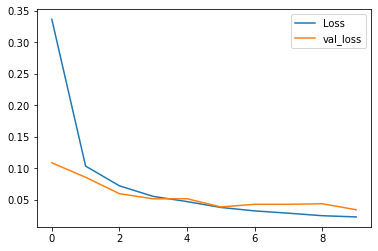

In [14]:
#Plot Loss Per Iteration
plt.plot(r.history ["loss"] , label = 'Loss')
plt.plot(r.history ["val_loss"], label = "val_loss")
plt.legend()

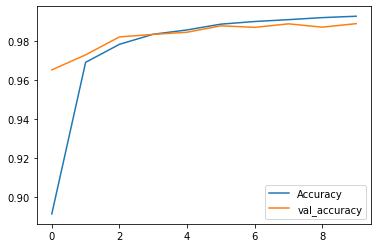

In [16]:
#Plot Accuracy Per Iteration
plt.plot(r.history["accuracy"], label = 'Accuracy')
plt.plot(r.history["val_accuracy"], label = 'val_accuracy')
plt.legend()

Confusion, Matrix without Normalization
[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1130    0    0    0    1    1    1    2    0]
 [   1    1 1019    2    2    0    0    5    2    0]
 [   0    0    6  994    1    3    0    1    5    0]
 [   0    0    1    0  977    0    2    0    1    1]
 [   1    1    0    5    0  877    2    1    5    0]
 [   2    2    2    0    0    2  949    0    1    0]
 [   0    4    6    0    3    0    0 1014    0    1]
 [   0    0    1    2    0    1    0    2  967    1]
 [   1    0    2    3    6    7    0    4    1  985]]


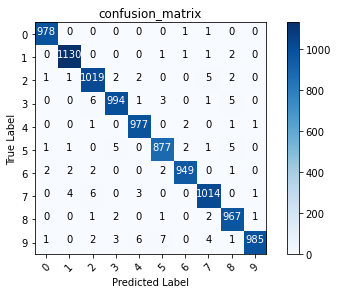

In [17]:
#Plot for Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize = False, title = 'confusion_matrix', cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix
  Normalization can be applied by setting normalize = True
  """
  if normalize:
    cm = cm.astype('float')/cm.sum(axis = 1) [:, np.newaxis]
    print ('Normalized Confusion Matrix')
  else:
    print ('Confusion, Matrix without Normalization')
  print (cm)

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]), range (cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt), horizontalalignment = 'center', color = 'white' if cm [i,j] > thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict (x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


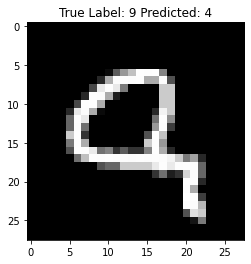

In [29]:
#Some Misclassified Examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title('True Label: %s Predicted: %s' %(y_test[i], p_test[i]));